In [5]:
import os
# set the appropriate path to whichever R installation we'd like to use
os.environ['R_HOME'] = '/Users/nathanielnyema/opt/anaconda3/envs/fnc/lib/R'
import rpy2
import sys
sys.path.append('../')
from fnc_analysis import *
from scipy import stats as st
from statsmodels.stats.multitest import multipletests
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pingouin as pg
from pathlib import Path
%load_ext autoreload
%autoreload 2
%load_ext rpy2.ipython

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [6]:
# figure settings
mpl.rcParams['font.family'] = 'sans-serif'
mpl.rcParams['font.sans-serif'] = 'Arial'
mpl.rcParams['svg.fonttype']='none'
mpl.rcParams['font.size']= 8
ctl_col = '#D4D4D4'
stim_col = '#06e1e9'

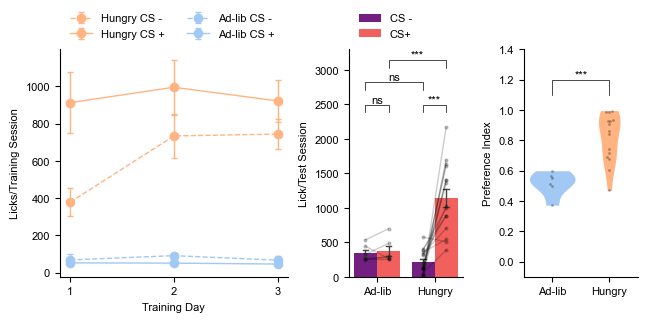

In [8]:
data_dir = "../../../data/behavior/"

df_s1 = load_data(os.path.join(data_dir,"sated1","total_licks_sated1.csv"))
df = load_data(os.path.join(data_dir, "unlimited_intake","total_licks_normal_intake.csv"))

df_train_s1 = subset_df(df_s1, 'training')
df_train_g = subset_df(df, 'training')

df_test_s1 = subset_df(df_s1, 'test')
df_test_g = subset_df(df, 'test')


fd_ctl = average_test_data(df_test_g, Chr2=False)
adlib_ctl = average_test_data(df_test_s1, Chr2=False)

fig, ax = plt.subplots(1,3, figsize = (6.5,3.25), 
                       gridspec_kw = {"width_ratios": [2,1,1]})

training_plot(df_train_g.loc[False,], df_train_s1.loc[False,], groups=['Hungry', 'Ad-lib'],
              colors = sns.color_palette('pastel',2)[::-1], ax = ax[0], ms=6, lw = 1);
_, _ = two_bottle_plot(fd_ctl, adlib_ctl,  ax=ax[1], ms=2, lw=1,
                        groups= ['Hungry', 'Ad-lib']);

# plot lick preference index
_, _, _= two_bottle_pref_plot_vl(df_test_g.loc[False,], df_test_s1.loc[False,], 
                                 groups= ['Hungry', 'Ad-lib'], ms=2,
                                 ax=ax[2], palette= sns.color_palette('pastel',2)[::-1]);

fig.tight_layout(pad = 1)
fig.savefig("../figures/svgs/sated_training_rebuttal.svg")